# Predeksi Covid-19 Prov SULSEL dengan Linear Regression 

1. Memanggil Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

2. Memanggil Dataset

In [5]:
dataset = pd.read_csv('Data Sulsel.csv')
tanggal = dataset['Tanggal']
x = dataset['index']
yPo = dataset['Positif']
yO = dataset['ODP']
yP = dataset['PDP']
dataset

,index,Tanggal,Positif,Sembuh,Meninggal,ODP,PDP
0,1,4/3/2020,14,4,6,420,49
1,2,4/4/2020,0,9,6,347,63
2,3,4/5/2020,2,19,7,94,28
3,4,4/6/2020,30,21,9,77,19
4,5,4/7/2020,10,23,11,91,24
5,6,4/8/2020,6,23,11,31,18
6,7,4/9/2020,7,23,13,81,5
7,8,4/10/2020,33,23,14,70,17
8,9,4/11/2020,10,30,14,69,36
9,10,4/12/2020,28,30,16,22,0


3. Menampilkan Grafik Data Asli

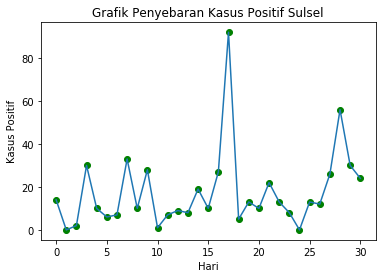

In [10]:
dataku = pd.DataFrame(dataset)
plt.scatter(dataku.index, dataku.Positif, c='g')
plt.plot(dataku.index, dataku.Positif)
plt.xlabel("Hari")
plt.ylabel("Kasus Positif")
plt.title("Grafik Penyebaran Kasus Positif Sulsel")
plt.show()

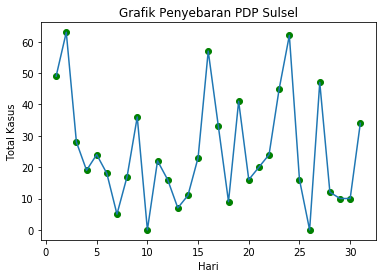

In [12]:
plt.scatter(x, yP, c='g')
plt.plot(x, yP)
plt.xlabel("Hari")
plt.ylabel("Total Kasus")
plt.title("Grafik Penyebaran PDP Sulsel")
plt.show()

4. Implementasi Metode Linear Regression

In [13]:
prediksi = (
    '4 Mei 2020',
    '5 Mei 2020',
    '6 Mei 2020',
    '7 Mei 2020',
    '8 Mei 2020',
    '9 Mei 2020',
    '10 Mei 2020',
    '11 Mei 2020',
    '12 Mei 2020',
    '13 Mei 2020',
)

In [15]:
from sklearn.linear_model import LinearRegression
X = x.values.reshape(-1,1)
Y = yPo.values.reshape(-1,1)
Y1= yP.values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, Y)
regressor1 = LinearRegression()
regressor1.fit(X,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

PREDIKSI KASUS POSITIF COVID-19 SULAWESI SELATAN (4-13 Mei 2020)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print('Nilai Koefisien m = ',lin_reg.coef_) #b0
print('Nilai koefisien c = ',lin_reg.intercept_) #b1
print("Model Linear (Y = mx + c): Y = {:.5}X + {:.5}".format(lin_reg.coef_[0][0], lin_reg.intercept_[0]))


Nilai Koefisien m =  [[0.5125]]
Nilai koefisien c =  [9.38064516]
Model Linear (Y = mx + c): Y = 0.5125X + 9.3806


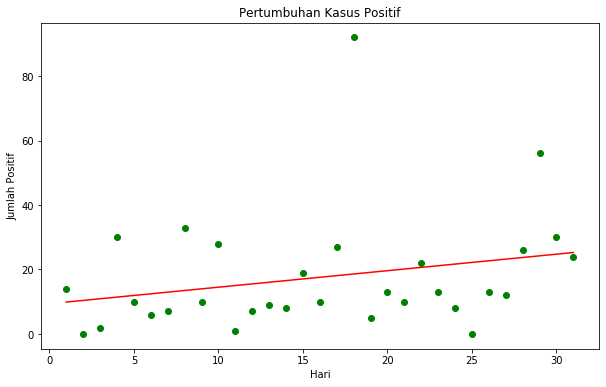

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Pertumbuhan Kasus Positif")
plt.xlabel('Hari')
plt.ylabel('Jumlah Positif')
plt.scatter(x, yPo,  c='g')
plt.plot(x, lin_reg.predict(X),  c='r')

In [19]:
x_ = np.size(x)+1
for tanggal in prediksi:
        print(tanggal ,':', int(lin_reg.predict([[x_]])),' kasus')
        x_ +=1

4 Mei 2020 : 25  kasus
5 Mei 2020 : 26  kasus
6 Mei 2020 : 26  kasus
7 Mei 2020 : 27  kasus
8 Mei 2020 : 27  kasus
9 Mei 2020 : 28  kasus
10 Mei 2020 : 28  kasus
11 Mei 2020 : 29  kasus
12 Mei 2020 : 29  kasus
13 Mei 2020 : 30  kasus


PREDIKSI TOTAL KASUS PDP SULSEL (4 - 13 Mei 2020)

In [20]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X, Y1)
print('Nilai Koefisien m = ',lin_reg1.coef_)
print('Nilai koefisien c = ',lin_reg1.intercept_)
print("Persamaan Linear (Y = mx + c): Y = {:.5}X + {:.5}".format(lin_reg1.coef_[0][0], lin_reg1.intercept_[0]))

Nilai Koefisien m =  [[-0.18064516]]
Nilai koefisien c =  [27.85806452]
Persamaan Linear (Y = mx + c): Y = -0.18065X + 27.858


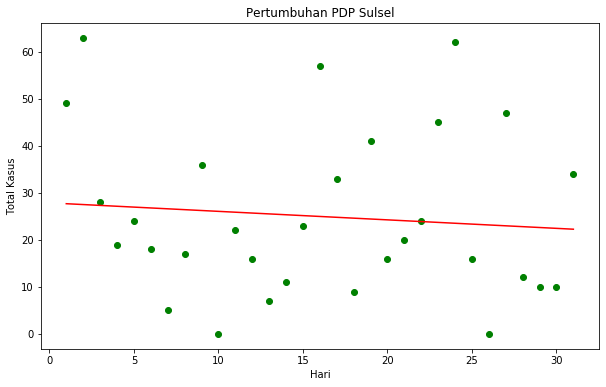

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Pertumbuhan PDP Sulsel")
plt.xlabel('Hari')
plt.ylabel('Total Kasus')
plt.scatter(x, yP,  c='g')
plt.plot(x, lin_reg1.predict(X),  c='r')

In [23]:
x_ = np.size(x)+1
for tanggal in prediksi:
        print(tanggal ,':', int(lin_reg1.predict([[x_]])),' kasus')
        x_ +=1

4 Mei 2020 : 22  kasus
5 Mei 2020 : 21  kasus
6 Mei 2020 : 21  kasus
7 Mei 2020 : 21  kasus
8 Mei 2020 : 21  kasus
9 Mei 2020 : 21  kasus
10 Mei 2020 : 20  kasus
11 Mei 2020 : 20  kasus
12 Mei 2020 : 20  kasus
13 Mei 2020 : 20  kasus


5. Prediksi tanpa menggunakan library untuk 5 hari ke depan mulai (4 Mei - 13 Mei 2020)

In [27]:
def persamaan_linear(x, y):
    n = np.size(x)
    m = ((np.sum(y) * np.sum(x*x)) - (np.sum(x) * np.sum(x*y))) / ((n * np.sum(x*x)) - np.power(np.sum(x), 2)) #b1
    c = ((n * np.sum(x*y)) - (np.sum(x) * np.sum(y))) / ((n * np.sum(x*x)) - np.power(np.sum(x), 2)) #b0
    return m, c
          
def f_prediksi(konstanta, title=''):
    print(title)
    x_ = np.size(x)+1
    for tanggal in prediksi:
        y_ = konstanta[0] + konstanta[1]*x_
        print(tanggal ,':', int(y_),' kasus')
        x_ +=1
        
def r_squared(x, y_obs, b, title=''):
    y_pred = []
    for _x in x:
        _y = b[0] + b[1]*_x
        y_pred.append(_y)
        
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_obs)
    sse = np.sum(np.power(y_obs - y_pred,2))
    tss = np.sum(np.power(y_obs - y_mean,2))
    r_square = 1 - (sse/tss)
    print('Nilai R Square', title, 'adalah :', r_square)

In [29]:
positif = persamaan_linear(x, yPo)
print("Parameter :\nm = {} \nc ={} ".format(positif[1],positif[0]))
print("Persamaan Linear (Y = mx + c): Y = {:.5}X + {:.5}".format(positif[1],positif[0]))
r_squared(x, yPo, positif, 'Kasus Positif')

Parameter :
m = 0.5125 
c =9.380645161290323 
Persamaan Linear (Y = mx + c): Y = 0.5125X + 9.3806
Nilai R Square Kasus Positif adalah : 0.06425493374996805


In [30]:
f_prediksi(positif, 'Prediksi Pertambahan Kasus PositiCovid19 Pada Tanggal')

Prediksi Pertambahan Kasus PositiCovid19 Pada Tanggal
4 Mei 2020 : 25  kasus
5 Mei 2020 : 26  kasus
6 Mei 2020 : 26  kasus
7 Mei 2020 : 27  kasus
8 Mei 2020 : 27  kasus
9 Mei 2020 : 28  kasus
10 Mei 2020 : 28  kasus
11 Mei 2020 : 29  kasus
12 Mei 2020 : 29  kasus
13 Mei 2020 : 30  kasus


In [33]:
total_kasus = persamaan_linear(x, yP)
print("Parameter :\nm = {} \nc ={} ".format(total_kasus[1],total_kasus[0]))
print("Persamaan Linear (Y = mx + c): Y = {:.5}X + {:.5}".format(total_kasus[1],total_kasus[0]))
r_squared(x, yP, positif, 'Kasus Positif')

Parameter :
m = -0.18064516129032257 
c =27.858064516129033 
Persamaan Linear (Y = mx + c): Y = -0.18065X + 27.858
Nilai R Square Kasus Positif adalah : -0.3011544735035745


In [32]:
f_prediksi(total_kasus, 'Prediksi Pertambah Kasus PDP Covid-19 Pada Tanggal')

Prediksi Total Kasus Covid-19 Pada Tanggal
4 Mei 2020 : 22  kasus
5 Mei 2020 : 21  kasus
6 Mei 2020 : 21  kasus
7 Mei 2020 : 21  kasus
8 Mei 2020 : 21  kasus
9 Mei 2020 : 21  kasus
10 Mei 2020 : 20  kasus
11 Mei 2020 : 20  kasus
12 Mei 2020 : 20  kasus
13 Mei 2020 : 20  kasus
